# Callcenter calls

Om de verloven van het personeel van een call center te plannen wil men het aantal calls van de volgende 3 maand voorspellen aan de hand van Seasonal Decomposition Forecasting. Het aantal calls per maand vind je terug in het bestand `calls4jaar.csv` (oude examenvraag)

In [1]:
import numpy as np
import pandas as pd

calls = pd.read_csv('../datasets/calls4jaar.csv', sep=';')
calls.head()
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Jaar         48 non-null     int64
 1   Maand        48 non-null     int64
 2   AantalCalls  48 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


a) Bekijk met autocorrelatie wat de periode van de seizoen component is. Wat is de periode? Vergeet niet dat je daarvoor float-waarden moet hebben. Misschien moet je het aantal lags ook vergroten.

array([ 1,  2,  3, 12, 11, 10,  9, 13,  4,  8, 14,  6,  5,  7, 15, 16, 18,
       19, 17], dtype=int64)

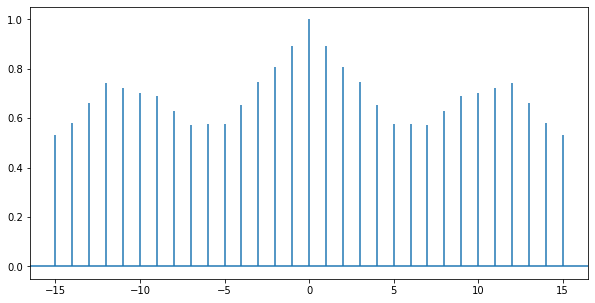

In [2]:
from scripts.forecast import *
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
lags, acfs, _, _ = ax.acorr(calls.AantalCalls.to_numpy(dtype=float), maxlags=15)

find_period(calls.AantalCalls, maxlags=20, top_n=20)
# de periode is 12

b) Hoe groot is de autocorrelatie voor deze periode?

In [31]:
pd.DataFrame(acfs, index=np.arange(-15, 16), columns=['acf']).loc[12]

acf    0.741301
Name: 12, dtype: float64

c) Gaan we het additief of multiplicatief model gebruiken? Maak een grafiek van het aantal calls.

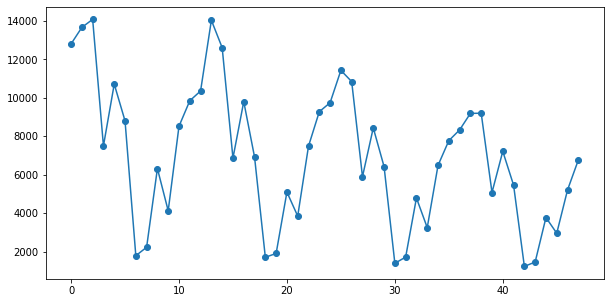

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.plot(calls.AantalCalls, marker='o')
#  De gegevens vertonen duidelijk een verzwakkend effect in het seizoenspatroon dus multiplicatief

d) Als we de trend benaderen door een rechte, wat is de waarde van de slope (richtingscoëfficient)?

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd_model = seasonal_decompose(calls.AantalCalls, model='m', period=12)
# regressie model opstellen voor de trend zonder NA's

trend_data = sd_model.trend.dropna()

X = trend_data.index.to_numpy()
y = trend_data.to_numpy()

reg_model = GeneralRegression()
reg_model.fit(X, y)
reg_model.coef_

array([  0.        , -80.43607357])

e) Geef de voorspelling voor de volgende 2 maand en maak ook een grafiek.

array([6899.15108261, 8214.01514896])

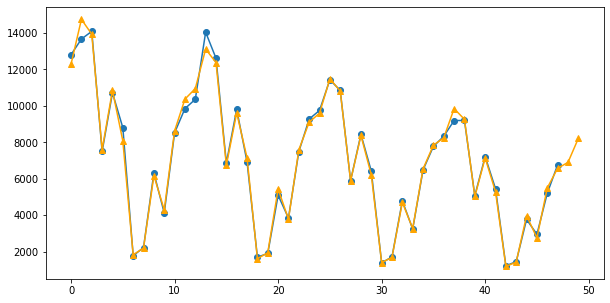

In [46]:
prediction = seasonal_decomposition_forecast(reg_model, sd_model, 0, 50, method='m', m=12)
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.plot(calls.AantalCalls, marker='o')
_ = ax.plot(prediction, marker='^', color='orange')

prediction[-2:]

f) Geef de waarde van de MAPE voor het model.

In [47]:
np.nanmean(np.abs(sd_model.resid / calls.AantalCalls))

0.00021561747895948867